<a href="https://colab.research.google.com/github/abnermassimo1/Metodos-Numericos/blob/main/ComparacionInterpolaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COMPARACION DE INTERPOLACION**

Vamos a comparar las sigueintes interpolaciones Lagrange,Newton y Hermite con la sigueinte funcion:
$$f(x) = 1/(1 + 25x^2)$$
En el intervalo  [-1,1], tomando puntos espaciados.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator, KroghInterpolator, CubicHermiteSpline

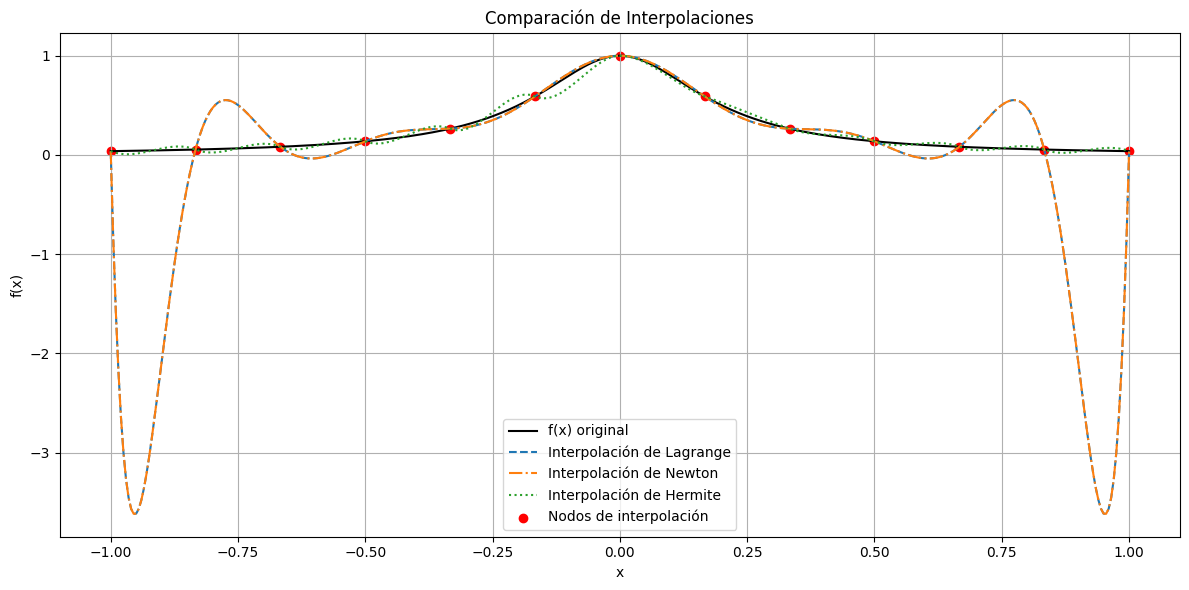

In [15]:
# Definición de la función f(x)
def f(x):
    return 1 / (1 + 25 * x**2)

# Derivada de la función f(x), necesaria para la interpolación de Hermite
def df(x):
    return -50 * x / (1 + 25 * x*2)*2

# Crear 9 nodos igualmente espaciados en el intervalo [-1, 1]
x_nodes = np.linspace(-1, 1, 13)
y_nodes = f(x_nodes)
dy_nodes = df(x_nodes)

# Crear un conjunto de puntos densos para graficar las curvas
x_dense = np.linspace(-1, 1, 400)
y_true = f(x_dense)  # Evaluar la función original en esos puntos

# Interpolación de Lagrange usando BarycentricInterpolator
lagrange_poly = BarycentricInterpolator(x_nodes, y_nodes)
y_lagrange = lagrange_poly(x_dense)

# Interpolación de Newton usando KroghInterpolator
newton_poly = KroghInterpolator(x_nodes, y_nodes)
y_newton = newton_poly(x_dense)

# Interpolación de Hermite usando CubicHermiteSpline
hermite_poly = CubicHermiteSpline(x_nodes, y_nodes, dy_nodes)
y_hermite = hermite_poly(x_dense)

# Graficar todas las curvas
plt.figure(figsize=(12, 6))
plt.plot(x_dense, y_true, label='f(x) original', color='black')
plt.plot(x_dense, y_lagrange, label='Interpolación de Lagrange', linestyle='--')
plt.plot(x_dense, y_newton, label='Interpolación de Newton', linestyle='-.')
plt.plot(x_dense, y_hermite, label='Interpolación de Hermite', linestyle=':')
plt.scatter(x_nodes, y_nodes, color='red', label='Nodos de interpolación')
plt.title('Comparación de Interpolaciones')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()